In [2]:
import cv2
import imutils # imutils is a Python library designed to simplify common image processing tasks, especially when working with OpenCV
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "/opt/homebrew/bin/tesseract" 
import matplotlib.pyplot as plt
from PIL import Image # for resizing and working with image opened using PIL, can't be accessed in cv2 unless image saved first and then opened

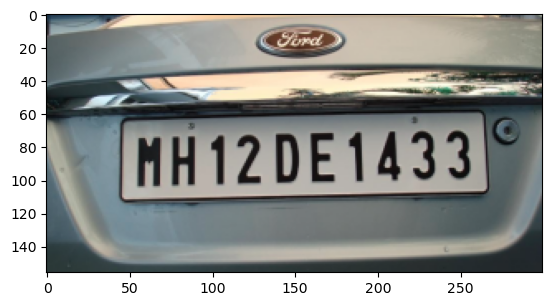

In [3]:
image= Image.open('/users/rajataggarwal/desktop/testl.png')
img= cv2.imread('/users/rajataggarwal/desktop/test3.png')
img= imutils.resize(img, width=300, height=300) # resizing the image to 300x300 pixels
#cv2.imshow('title of window opened', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(img) # not using cv2.imshow() because it is causing some problem to me here in macos


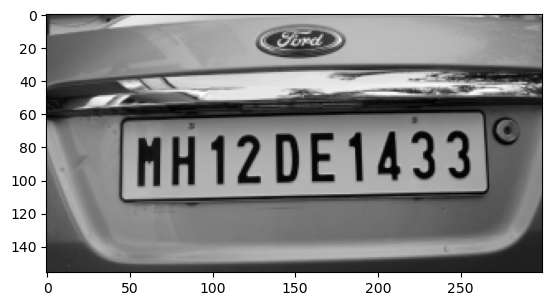

In [4]:
img2= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap='gray')


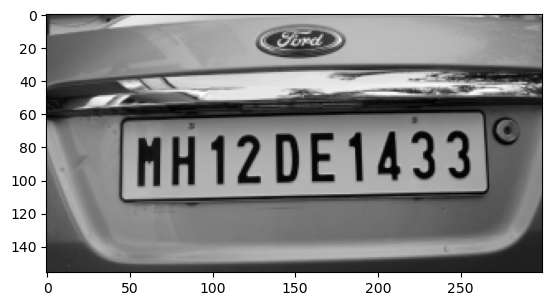

In [5]:
#lets' reduce noise in the image and smoothen the effect
img2- cv2.bilateralFilter(img2, 11, 17, 17) 
#A bilateral filter is used for smoothing images while preserving edges. It reduces noise without blurring the boundaries of objects.
# 11 is the diameter of pixel neighborhood, 17 is the sigma in color space and 17 is the sigma in coordinate space
#SigmaColor: This controls the color sensitivity of the filter. A larger value means that pixels with larger colors difference will still be blended. This helps in smoothing out color noise in the image.
#SigmaSpace: This controls the spatial extent of the filter. A larger value means that pixels farther away from the center pixel will influence the filtered value more.
#It assigns a weight to each pixel based on its distance from the center pixel. The farther away a pixel is, the less influence it has—unless sigmaSpace is large.
plt.imshow(img2, cmap='gray')


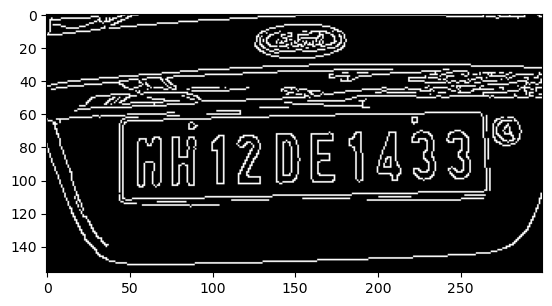

In [6]:
#now we will detect the edges in the image
img3= cv2.Canny(img2, 50, 200) # Canny edge detection algorithm
#Strong edges (above 200): Always considered edges.
#Weak edges (between 50 and 200): Included only if connected to strong edges.
#No edge (below 50): Ignored completely.
plt.imshow(img3, cmap='gray')

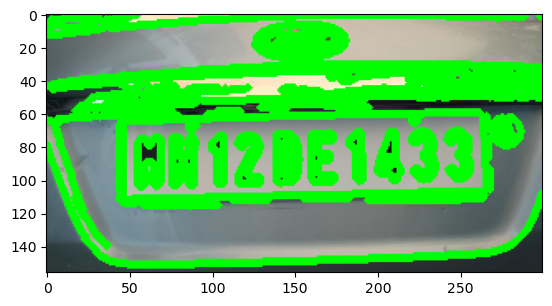

In [7]:
#Now we have to find contours in the image
#Contours are curves joining all the continuous points along a boundary that have the same color or intensity.
cnts, new= cv2.findContours(img3.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image1= img.copy()
cv2.drawContours(image1, cnts, -1, (0, 255, 0), 3) # draw all contours
#-1 means all contours, (0, 255, 0) is the color of the contour in BGR format and 3 is the thickness of the contour
plt.imshow(image1)

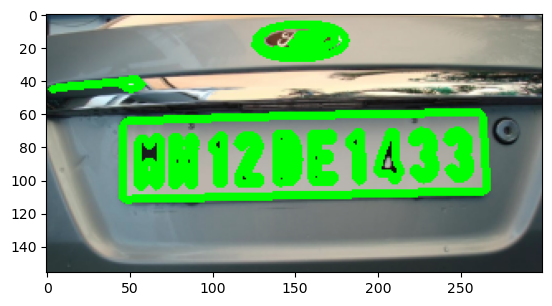

In [8]:
cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[:30] # sort the contours based on area and take the top 115
screenCnt= None # initialize the screen contour
image2= img.copy() 
cv2.drawContours(image2, cnts, -1, (0, 255, 0), 3)
plt.imshow(image2)

In [9]:
i=7
for c in cnts:
    peri= cv2.arcLength(c, True) # calculate the perimeter of the contour
    approx= cv2.approxPolyDP(c, 0.018* peri, True) # approximate the contour to a polygon
    if len(approx)==4: # if the polygon has 4 sides, then we have found our screen contour
        screenCnt= approx
        x, y, w, h= cv2.boundingRect(c) # get the bounding rectangle of the contour
        new_img= img[y:y+h, x:x+w] # crop the image to the bounding rectangle
        cv2.imwrite('./'+str(i)+'.png', new_img) # save the cropped image
        i+=1
        break

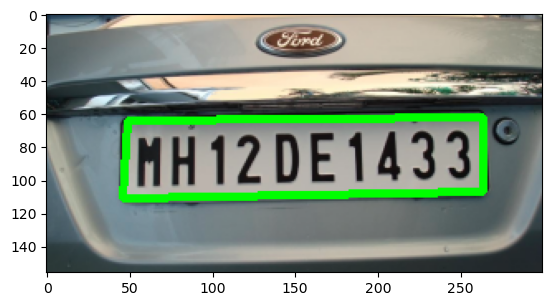

In [10]:
cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3) # draw the screen contour
plt.imshow(img)

In [11]:
Cropped_loc='./7.png'
cv2.imshow("cropped", cv2.imread(Cropped_loc))
plate= pytesseract.image_to_string(Cropped_loc,lang= 'eng') # use pytesseract to extract text from the image
print(plate) # print the extracted text
cv2.waitKey(0)
cv2.destroyAllWindows()


MH12DE1433

